# EDA - Administrative, Informational and ProductRelated features

The following notebook performs exploratory data analysis on numerical columns

## Contents

- [Administrative](#admin)
- [Informational](#info)
- [ProductRelated](#product)
- [AllPages](#all)
- [Summary](#summary)

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import os

%reload_ext autoreload
%autoreload 1

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)

display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
import calendar

from Utils.DataUtils import *
from Utils.VizUtils import *

In [3]:
data_path = "./data/online_shoppers_purchasing_intention/online_shoppers_intention.csv"
data = pd.read_csv(data_path)
display(
    data.shape,
    data.head()
)

(12330, 18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
display(
    data.shape,
    data.head()
)

(12205, 18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
analyse_nans(data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
idx_list,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]


Notes :
- No missing values
- Train test split 
- Encoding (no pd.getdummies())
- Scaling

In [7]:
# Quick helper variable
rev_palette = {True:'cornflowerblue', False:'mistyrose'}

### Revenue 

False    84.367063
True     15.632937
Name: Revenue, dtype: float64

None

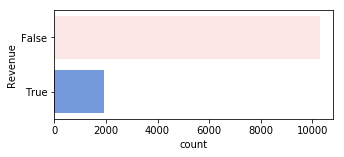

In [8]:
f, ax = plt.subplots(1,1,figsize=(5,2))
g = sns.countplot(y="Revenue", data=data, ax=ax, palette=rev_palette)

display(display(100*data["Revenue"].value_counts() / data.shape[0]))

Let's split the data into training, validation and testing datasets.

False    84.361466
True     15.638534
Name: Revenue, dtype: float64

(8543, 18)

False    84.38012
True     15.61988
Name: Revenue, dtype: float64

(1831, 18)

False    84.38012
True     15.61988
Name: Revenue, dtype: float64

(1831, 18)

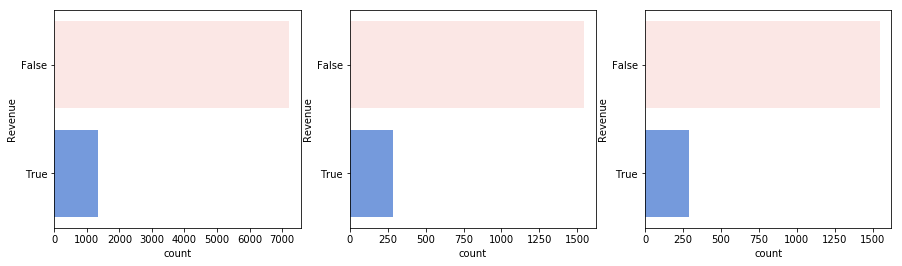

In [9]:
train_val_data, test_data = train_test_split(data, 
                                             test_size=.15,
                                             stratify=data["Revenue"])
train_data, val_data = train_test_split(train_val_data, 
                                        test_size=test_data.shape[0]/train_val_data.shape[0], 
                                        stratify=train_val_data["Revenue"])
f, ax = plt.subplots(1,3,figsize=(15,4))
g = sns.countplot(y="Revenue", data=train_data, ax=ax[0], palette=rev_palette)
g = sns.countplot(y="Revenue", data=val_data, ax=ax[1], palette=rev_palette)
g = sns.countplot(y="Revenue", data=test_data, ax=ax[2], palette=rev_palette)

display(100*train_data["Revenue"].value_counts() / train_data.shape[0], train_data.shape)
display(100*val_data["Revenue"].value_counts() / val_data.shape[0], val_data.shape)
display(100*test_data["Revenue"].value_counts() / test_data.shape[0], test_data.shape)

#  Administrative Page information<a id='admin'></a>

## How many customers goto admin pages and end with a purchase?


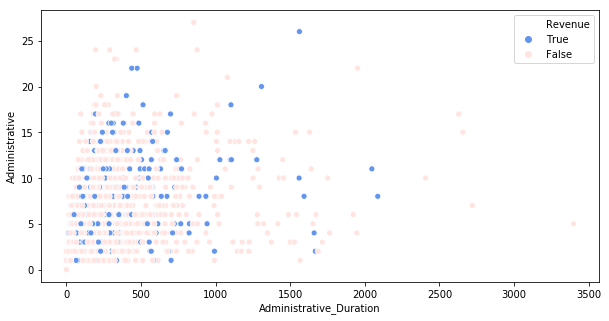

In [10]:
f, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.scatterplot(x="Administrative_Duration", y="Administrative", hue="Revenue", data=train_data, ax=ax, hue_order=[True, False], palette=rev_palette)

Not much can be inferred with a scatter plot.

How do each of the variables affect the Revenue outcome for each group?

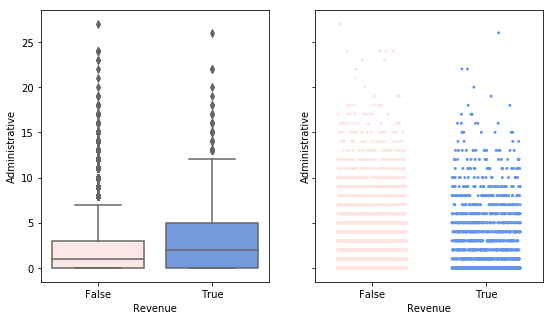

In [12]:
# f, ax = plt.subplots(2,1,figsize=(12,12))
# g = sns.boxplot(x="Administrative", y="Revenue", data=train_data, ax=ax[0], orient='horizontal', palette=rev_palette)
# g = sns.stripplot( x="Administrative", y="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
#                  size = 3, jitter = 0.3, zorder = 0, orient = 'horizontal')
f, ax = plt.subplots(1,2,figsize=(9,5), sharey=True)
g = sns.boxplot(y="Administrative", x="Revenue", data=train_data, ax=ax[0], orient='vertical', palette=rev_palette)
g = sns.stripplot( y="Administrative", x="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
                 size = 3, jitter = 0.3, zorder = 0, orient = 'vertical')
# g.set(ylim=(-1, 15))

**Null Hypothesis** : There is no difference between means of the two groups

**Alternate Hypothesis** : There is a difference between means of the two groups


In [12]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=train_data.query("Revenue==True")['Administrative'],
                       b=train_data.query("Revenue==False")['Administrative'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 2.044233407806842e-35
We reject null hypothesis


In [13]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=train_data.query("Revenue==True")['Administrative'], 
                           x2=train_data.query("Revenue==False")['Administrative'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.005322246451723e-35
We reject null hypothesis


The number of visits to an administration page is significantly different for each group.

### Does the time spent on admin pages have an effect as well?

[(-10, 500)]

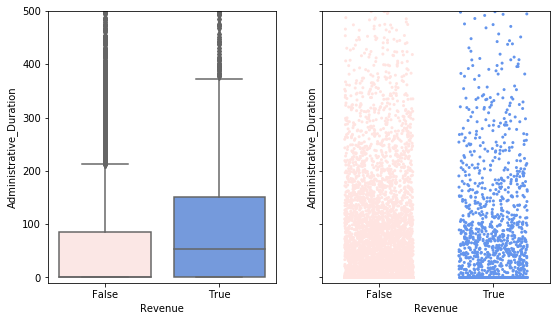

In [15]:
# f, ax = plt.subplots(2,1,figsize=(12,12))
# g = sns.boxplot(x="Administrative_Duration", y="Revenue", data=train_data, ax=ax[0], orient='horizontal', palette=rev_palette)
# g = sns.stripplot( x="Administrative_Duration", y="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
#                  size = 3, jitter = 0.3, zorder = 0, orient = 'horizontal')

f, ax = plt.subplots(1,2,figsize=(9,5), sharey=True)
g = sns.boxplot(y="Administrative_Duration", x="Revenue", data=train_data, ax=ax[0], orient='vertical', palette=rev_palette)
g = sns.stripplot( y="Administrative_Duration", x="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
                 size = 3, jitter = 0.3, zorder = 0, orient = 'vertical')
g.set(ylim=(-10, 500))

**Null Hypothesis** : There is no difference between means of the two groups

**Alternate Hypothesis** : There is a difference between means of the two groups


In [15]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=train_data.query("Revenue==True")['Administrative_Duration'],
                       b=train_data.query("Revenue==False")['Administrative_Duration'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 7.745260343600908e-16
We reject null hypothesis


In [16]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=train_data.query("Revenue==True")['Administrative_Duration'], 
                           x2=train_data.query("Revenue==False")['Administrative_Duration'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

6.817964224748573e-16
We reject null hypothesis


The amount of time spent on administrative pages is also different for each group.

-----------

#  Informational Pages<a id='info'></a>

## How many customers goto Informational pages and end with a purchase?


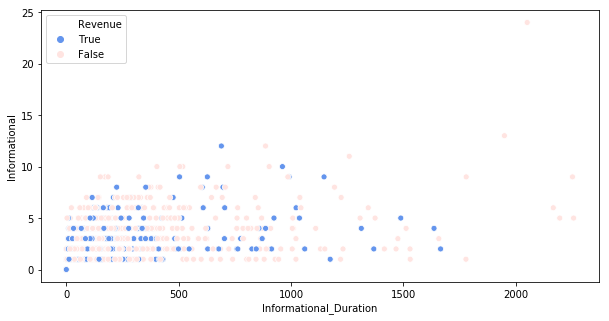

In [17]:
f, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.scatterplot(x="Informational_Duration", y="Informational", hue="Revenue", data=train_data, ax=ax, hue_order=[True, False], palette=rev_palette)

Not much can be inferred with a scatter plot.

How do each of the variables affect the Revenue outcome for each group?

[(-1, 15)]

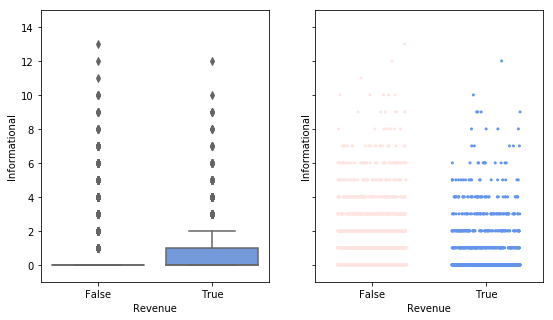

In [18]:
f, ax = plt.subplots(1,2,figsize=(9,5), sharey=True)
g = sns.boxplot(y="Informational", x="Revenue", data=train_data, ax=ax[0], orient='vertical', palette=rev_palette)
g = sns.stripplot( y="Informational", x="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
                 size = 3, jitter = 0.3, zorder = 0, orient = 'vertical')
g.set(ylim=(-1, 15))

**Null Hypothesis** : There is no difference between means of the two groups

**Alternate Hypothesis** : There is a difference between means of the two groups


In [19]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=train_data.query("Revenue==True")['Informational'],
                       b=train_data.query("Revenue==False")['Informational'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 1.1284127089671137e-18
We reject null hypothesis


In [20]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=train_data.query("Revenue==True")['Informational'], 
                           x2=train_data.query("Revenue==False")['Informational'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

9.403138963155625e-19
We reject null hypothesis


The number of visits to an Informational page is significantly different for each group.

### Does the time spent on Informational pages have an effect as well?

[(-10, 250)]

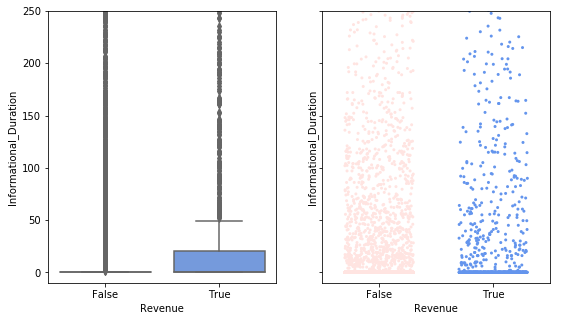

In [16]:
# f, ax = plt.subplots(2,1,figsize=(12,12))
# g = sns.boxplot(x="Informational_Duration", y="Revenue", data=train_data, ax=ax[0], orient='horizontal', palette=rev_palette)
# g.set(xlim=(-10,250))

# g = sns.stripplot( x="Informational_Duration", y="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
#                  size = 3, jitter = 0.3, zorder = 0, orient = 'horizontal')
# g.set(xlim=(-10,250))

f, ax = plt.subplots(1,2,figsize=(9,5), sharey=True)
g = sns.boxplot(y="Informational_Duration", x="Revenue", data=train_data, ax=ax[0], orient='vertical', palette=rev_palette)
g = sns.stripplot( y="Informational_Duration", x="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
                 size = 3, jitter = 0.3, zorder = 0, orient = 'vertical')
g.set(ylim=(-10,250))

**Null Hypothesis** : There is no difference between means of the two groups

**Alternate Hypothesis** : There is a difference between means of the two groups


In [22]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=train_data.query("Revenue==True")['Informational_Duration'],
                       b=train_data.query("Revenue==False")['Informational_Duration'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 3.1041874001948277e-09
We reject null hypothesis


In [23]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=train_data.query("Revenue==True")['Informational_Duration'], 
                           x2=train_data.query("Revenue==False")['Informational_Duration'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

2.9878938459680947e-09
We reject null hypothesis


The amount of time spent on Informational pages is also different for each group.

-----------

#  Product Pages<a id='product'></a>

## How many customers goto ProductRelated pages and end with a purchase?


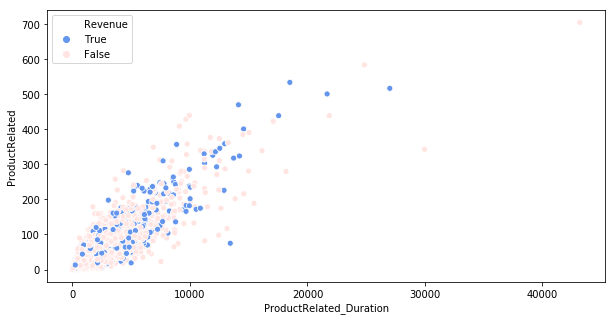

In [24]:
f, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.scatterplot(x="ProductRelated_Duration", y="ProductRelated", hue="Revenue", data=train_data, ax=ax, hue_order=[True, False], palette = rev_palette)

There seems to be a potential difference observable.

How do each of the variables affect the Revenue outcome for each group?

[(-10, 300)]

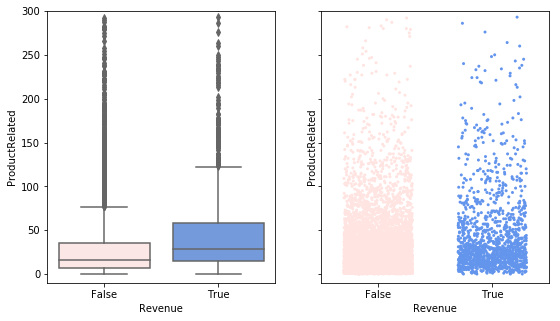

In [45]:
f, ax = plt.subplots(1,2,figsize=(9,5), sharey=True)
g = sns.boxplot(y="ProductRelated", x="Revenue", data=train_data, ax=ax[0], orient='vertical', palette=rev_palette)
g = sns.stripplot( y="ProductRelated", x="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
                 size = 3, jitter = 0.3, zorder = 0, orient = 'vertical')
g.set(ylim=(-10,300))

**Null Hypothesis** : There is no difference between means of the two groups

**Alternate Hypothesis** : There is a difference between means of the two groups


In [26]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=train_data.query("Revenue==True")['ProductRelated'],
                       b=train_data.query("Revenue==False")['ProductRelated'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 2.085442676453891e-53
We reject null hypothesis


In [27]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=train_data.query("Revenue==True")['ProductRelated'], 
                           x2=train_data.query("Revenue==False")['ProductRelated'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

3.9301088540591234e-54
We reject null hypothesis


The number of visits to an ProductRelated page is significantly different for each group.

### Does the time spent on ProductRelated pages have an effect as well?

[(-500, 10000)]

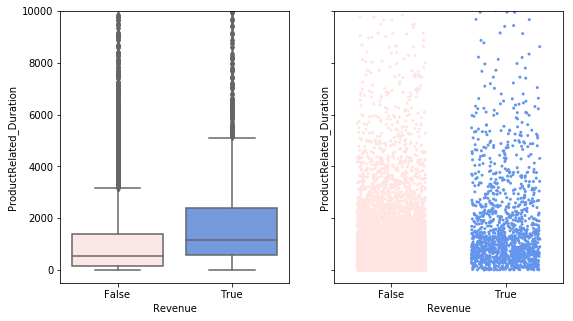

In [18]:
# f, ax = plt.subplots(2,1,figsize=(12,12))
# g = sns.boxplot(x="ProductRelated_Duration", y="Revenue", data=train_data, ax=ax[0], orient='horizontal', palette=rev_palette)
# g.set(xlim=(-500,10000))

# g = sns.stripplot( x="ProductRelated_Duration", y="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
#                  size = 3, jitter = 0.3, zorder = 0, orient = 'horizontal')
# g.set(xlim=(-500,10000))

f, ax = plt.subplots(1,2,figsize=(9,5), sharey=True)
g = sns.boxplot(y="ProductRelated_Duration", x="Revenue", data=train_data, ax=ax[0], orient='vertical', palette=rev_palette)
g = sns.stripplot( y="ProductRelated_Duration", x="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
                 size = 3, jitter = 0.3, zorder = 0, orient = 'vertical')
g.set(ylim=(-500,10000))

**Null Hypothesis** : There is no difference between means of the two groups

**Alternate Hypothesis** : There is a difference between means of the two groups


In [29]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=train_data.query("Revenue==True")['ProductRelated_Duration'],
                       b=train_data.query("Revenue==False")['ProductRelated_Duration'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 1.607929149772703e-51
We reject null hypothesis


In [30]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=train_data.query("Revenue==True")['ProductRelated_Duration'], 
                           x2=train_data.query("Revenue==False")['ProductRelated_Duration'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

3.416009015759469e-52
We reject null hypothesis


The amount of time spent on ProductRelated pages is also different for each group.

-----------

#  All Pages<a id='all'></a>

## What is the effect of all page visits on Revenue?


If all three kinds of page visits show significant difference on Revenue, can a combined feature create a stronger effect?

In [20]:
train_data["AllPageCount"] = train_data["Administrative"] + train_data["Informational"] + train_data["ProductRelated"]
train_data["AllPageCount_Duration"] = train_data["Administrative_Duration"] + train_data["Informational_Duration"] + train_data["ProductRelated_Duration"]

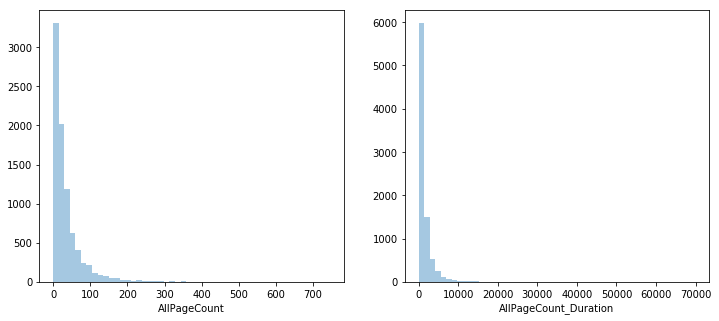

In [21]:
f, ax = plt.subplots(1,2,figsize=(12,5))
g = sns.distplot(a=train_data["AllPageCount"], ax=ax[0], kde=False)
g = sns.distplot(a=train_data["AllPageCount_Duration"], ax=ax[1], kde=False)

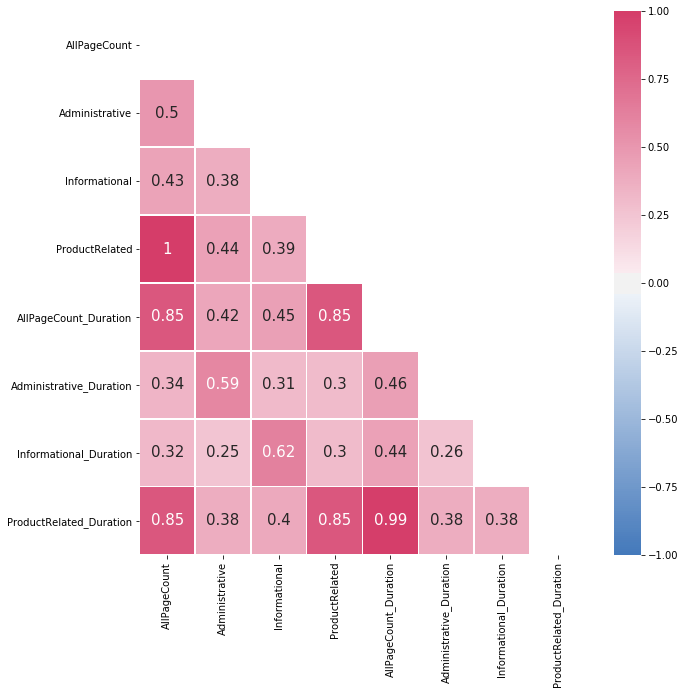

In [22]:
cols= ["AllPageCount", 
       "Administrative", "Informational", "ProductRelated", 
       "AllPageCount_Duration", 
       "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
f, ax = plt.subplots(1,1,figsize=(10,10))
plot_corr_heatmap(np.round(train_data[cols].corr(), 2), ax=ax, annotate=True)

There are strong correlations here. It may be prudent to remove some features while modeling

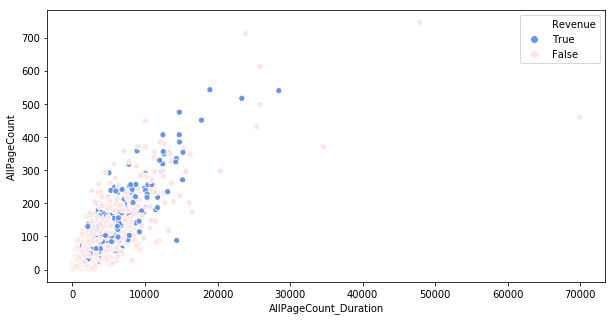

In [23]:
f, ax = plt.subplots(1,1,figsize=(10,5))
g = sns.scatterplot(x="AllPageCount_Duration", y="AllPageCount", hue="Revenue", data=train_data, ax=ax, hue_order=[True, False], palette = rev_palette)

There seems to be a potential difference observable.

How do each of the variables affect the Revenue outcome for each group?

[(-10, 200)]

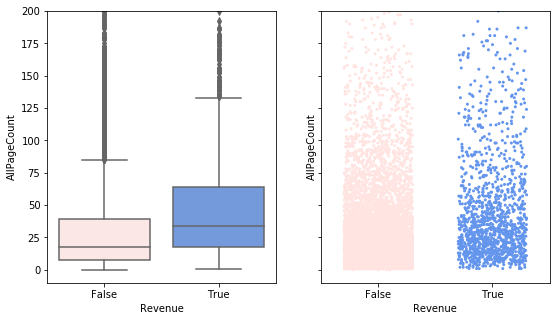

In [26]:
# f, ax = plt.subplots(1,1,figsize=(10,5))
# g = sns.boxplot(x="AllPageCount", y="Revenue", data=train_data, ax=ax, orient='horizontal', order=[True, False], palette = rev_palette)

f, ax = plt.subplots(1,2,figsize=(9,5), sharey=True)
g = sns.boxplot(y="AllPageCount", x="Revenue", data=train_data, ax=ax[0], orient='vertical', palette=rev_palette)
g = sns.stripplot( y="AllPageCount", x="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
                 size = 3, jitter = 0.3, zorder = 0, orient = 'vertical')
g.set(ylim=(-10,200))

**Null Hypothesis** : There is no difference between means of the two groups

**Alternate Hypothesis** : There is a difference between means of the two groups


In [36]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=train_data.query("Revenue==True")['AllPageCount'],
                       b=train_data.query("Revenue==False")['AllPageCount'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 1.4574738678897867e-56
We reject null hypothesis


In [37]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=train_data.query("Revenue==True")['AllPageCount'], 
                           x2=train_data.query("Revenue==False")['AllPageCount'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

2.2252648072070893e-57
We reject null hypothesis


The number of visits to an ProductRelated page is significantly different for each group.

### Does the time spent on All pages have an effect as well?

[(-500, 10000)]

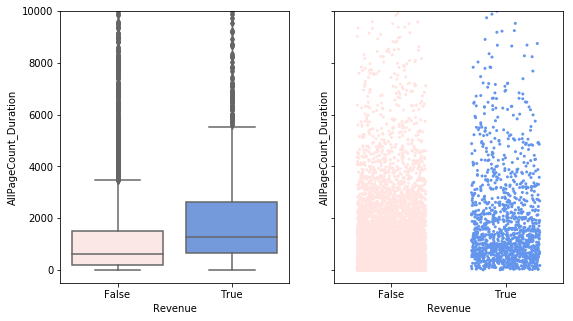

In [27]:
# f, ax = plt.subplots(2,1,figsize=(12,12))
# g = sns.boxplot(x="AllPageCount_Duration", y="Revenue", data=train_data, ax=ax[0], orient='horizontal', palette=rev_palette)
# g.set(xlim=(-500,10000))

# g = sns.stripplot( x="AllPageCount_Duration", y="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
#                  size = 3, jitter = 0.3, zorder = 0, orient = 'horizontal')
# g.set(xlim=(-500,10000))

f, ax = plt.subplots(1,2,figsize=(9,5), sharey=True)
g = sns.boxplot(y="AllPageCount_Duration", x="Revenue", data=train_data, ax=ax[0], orient='vertical', palette=rev_palette)
g = sns.stripplot( y="AllPageCount_Duration", x="Revenue", data=train_data, ax=ax[1], palette = rev_palette, edgecolor = "white",
                 size = 3, jitter = 0.3, zorder = 0, orient = 'vertical')
g.set(ylim=(-500,10000))

**Null Hypothesis** : There is no difference between means of the two groups

**Alternate Hypothesis** : There is a difference between means of the two groups


In [39]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(a=train_data.query("Revenue==True")['AllPageCount_Duration'],
                       b=train_data.query("Revenue==False")['AllPageCount_Duration'])
print("p-value",pval)
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value 4.360840694056042e-53
We reject null hypothesis


In [40]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1=train_data.query("Revenue==True")['AllPageCount_Duration'], 
                           x2=train_data.query("Revenue==False")['AllPageCount_Duration'], 
                           value=0,
                           alternative='two-sided')
print(float(pval))
if pval < 0.05:
    print("We reject null hypothesis")
else:
    print("We fail to reject the null hypothesis")

8.389787337206533e-54
We reject null hypothesis


The amount of time spent on All Pages is also different for each group.

----------

# Summary<a id='summary'></a>

Features such as "Informational" and "ProductRelated" appear to have strong predictive power.

All features passed statistical significance tests.

Two new features were created here.
1. AllPageCount
1. AllPageCount_Duration

In [41]:
train_data.drop(["AllPageCount", "AllPageCount_Duration"], axis=1, inplace=True)

In [42]:
train_data.to_csv("./train_data.csv", index=False)
val_data.to_csv("./val_data.csv", index=False)
test_data.to_csv("./test_data.csv", index=False)